# Predicting test results in healthcare sector using machine learning

> This notebook uses Python-based machine learning and data science libraries to build a machine learning model capable of predicting if a passenger would board flight or not next time based on services provided.

# 1. Problem Definition

Based on the data, we want to predict if a passenger would can his or her flight or not..

# 2. Data

> The data was downloaded from Kaggle.

# 3. Evaluation

> If we can reach 95% accuracy at predicting if the outcome would be flight cancelled or not, we will pursue the project.


# 4. Features

### # 2.1 Data dictionary
* **Gender**: Gender of the passengers (Female, Male)
* **Customer Type**: The customer type (Loyal Customer, Disloyal Customer)
* **Age**: The actual age of the passengers
* **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)
* **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
* **Flight Distance**: The flight distance of this journey
* **Inflight Wifi Service**: Satisfaction level of the inflight wifi service (0: Not Applicable; 1-5)
* **Departure/Arrival Time Convenient**: Satisfaction level of departure/arrival time convenience
* **Ease of Online Booking**: Satisfaction level of online booking
* **Gate Location**: Satisfaction level of gate location
* **Food and Drink**: Satisfaction level of food and drink
* **Online Boarding**: Satisfaction level of online boarding
* **Seat Comfort**: Satisfaction level of seat comfort
* **Inflight Entertainment**: Satisfaction level of inflight entertainment
* **On-board Service**: Satisfaction level of on-board service
* **Leg Room Service**: Satisfaction level of leg room service
* **Baggage Handling**: Satisfaction level of baggage handling
* **Check-in Service**: Satisfaction level of check-in service
* **Inflight Service**: Satisfaction level of inflight service
* **Cleanliness**: Satisfaction level of cleanliness
* **Departure Delay in Minutes**: Minutes delayed when departure
* **Arrival Delay in Minutes**: Minutes delayed when arrival
* **Satisfaction**: Airline satisfaction level (Satisfaction, Neutra or Dissatisfaction)
inutes the flight takes
:Minutes of Flight takes


# 5. Exploratory Data Analysis

In [1]:
# Import necessary libraries

# Data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.pipeline import Pipeline

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## 4.1 Load

In [2]:
data = pd.read_excel("satisfaction.xlsx")

In [3]:
data.shape

(129880, 24)

## 4.2 Exploratory Data Analysis (EDA)

In [4]:
# Set pandas options to avoid truncation
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  

In [5]:
data.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [6]:
data.tail()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0
129879,84566,neutral or dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0


In [7]:
data.satisfaction_v2.unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [8]:
data["satisfaction_v2"].value_counts()

satisfaction_v2
satisfied                  71087
neutral or dissatisfied    58793
Name: count, dtype: int64

From value counts, it looks like test results have balanced set of satisfied and neutral or dissatisfied

**Hence, no need to balance Test Results (target)**

(array([0, 1]),
 [Text(0, 0, 'satisfied'), Text(1, 0, 'neutral or dissatisfied')])

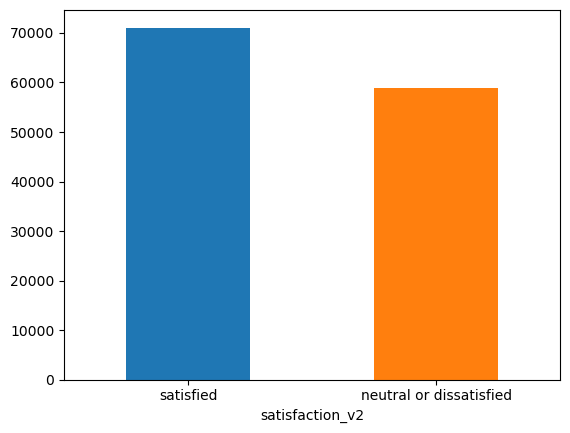

In [9]:
# Plot test results
data["satisfaction_v2"].value_counts().plot(kind="bar", color=['C0', 'C1']);
plt.xticks(rotation=0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [11]:
data.isna().sum()

# Arrival Delay in Minutes column has 393 missing celss

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [12]:
data["Arrival Delay in Minutes"].mode()

0    0.0
Name: Arrival Delay in Minutes, dtype: float64

In [13]:
print(f"Mode of Arrival Delay in Minutes: {data["Arrival Delay in Minutes"].mode()}")
print(f"Mean of Arrival Delay in Minutes: {data["Arrival Delay in Minutes"].mean()}")

Mode of Arrival Delay in Minutes: 0    0.0
Name: Arrival Delay in Minutes, dtype: float64
Mean of Arrival Delay in Minutes: 15.09112883918849


In [14]:
# Fill with zero (mode)
data["Arrival Delay in Minutes"] = data["Arrival Delay in Minutes"].fillna(data["Arrival Delay in Minutes"].mode()[0])


In [15]:
data.isna().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [16]:
#  calculates the number of duplicate rows
data.duplicated().sum()

0

In [17]:
# generate summary statistics for all object-type columns
# get a snapshot of your text-based data
data.describe(include=['O'])

,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [18]:
data.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.045465
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.416353
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## 4.3 Comparison of features

### 4.3.1 Age Distribution of Passenger

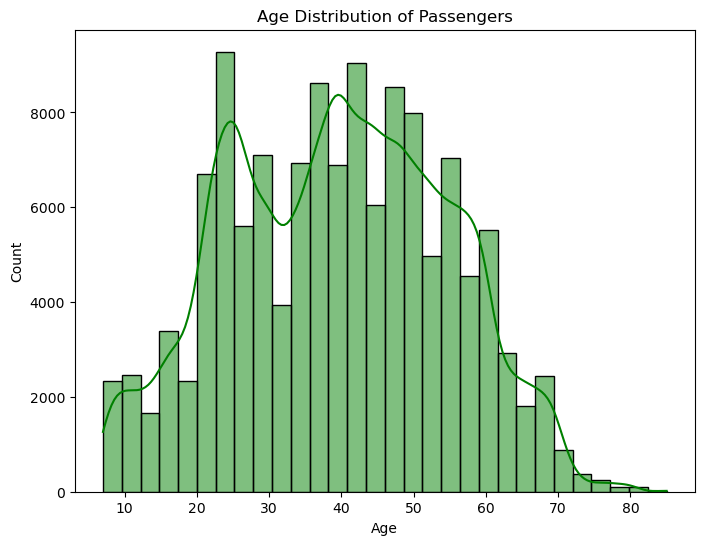

In [19]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', kde=True, bins=30, color='green')
plt.title('Age Distribution of Passengers');

### 4.3.2 Distribution of Satisfaction

C:\Users\Kayode\AppData\Local\Temp\ipykernel_13236\2002606376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='satisfaction_v2', palette='coolwarm')


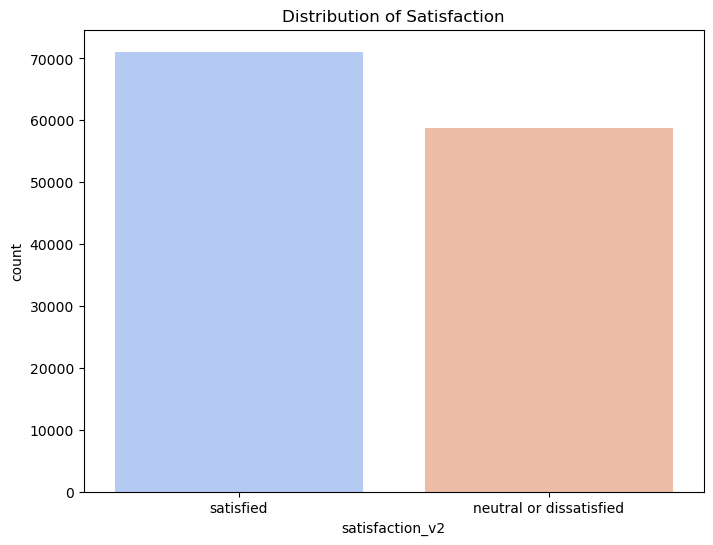

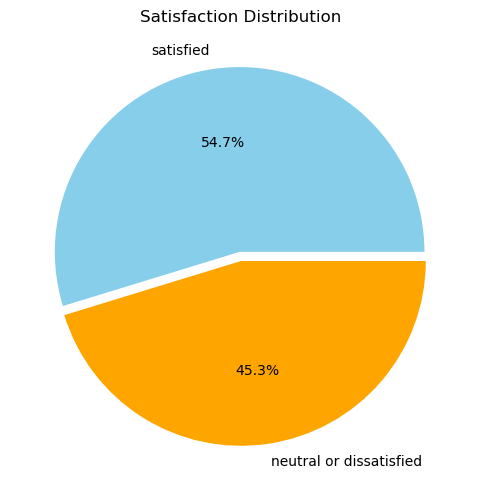

In [20]:
# Distribution of Satisfaction (Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='satisfaction_v2', palette='coolwarm')
plt.title('Distribution of Satisfaction')
plt.show()

# Distribution of Satisfaction (Pie Chart)
plt.figure(figsize=(6, 6))
data['satisfaction_v2'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'], explode=[0.05, 0])
plt.title('Satisfaction Distribution')
plt.ylabel('')  # Hide y-label
plt.show()


### 4.3.3 Satisfaction frequency with gender

In [21]:
data.Gender.value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [22]:
# Compare test results with gender
pd.crosstab(data["satisfaction_v2"], data["Gender"])

Gender,Female,Male
satisfaction_v2,,
neutral or dissatisfied,22971,35822
satisfied,42928,28159


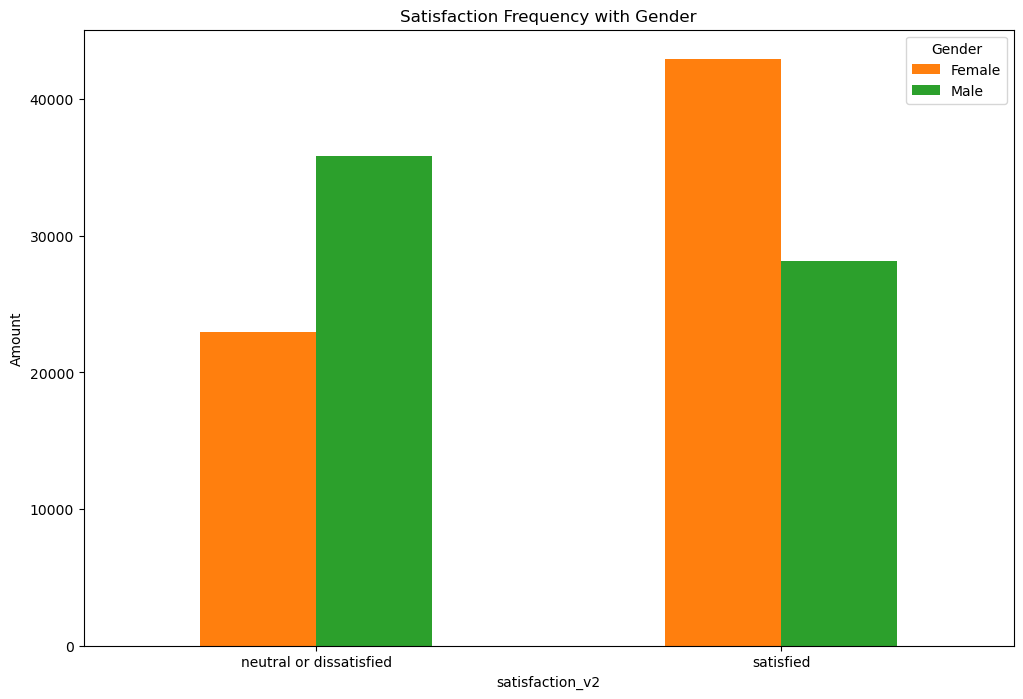

In [23]:
# plot
pd.crosstab(data["satisfaction_v2"], data["Gender"]).plot(kind="bar", figsize=(12, 8), color=["C1", "C2"])

plt.title("Satisfaction Frequency with Gender")
plt.ylabel("Amount")
plt.xticks(rotation=0);

* Number of satisfied female is almost 2 times of those female that are either neutral or dissatisfied.
* Female are more satisfied than male by 1.5 times
* Dissatisfied male are more than dissatisfied female by 1.5 times
* Dissatisfied male are more than satisfied male by 7663.

### 4.3.3 Customer Type Distribution

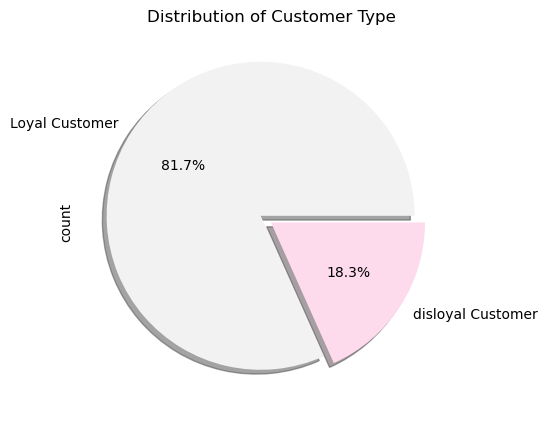

In [24]:
colors = plt.get_cmap('Pastel1_r').colors

data['Customer Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,5), title='Distribution of Customer Type', 
                                         explode=(0.08,0) , shadow=True , colors=colors);

### 4.3.4 Age Distribution by Type of Travel

Text(0.5, 1.0, 'Age Distribution by Type of Travel')

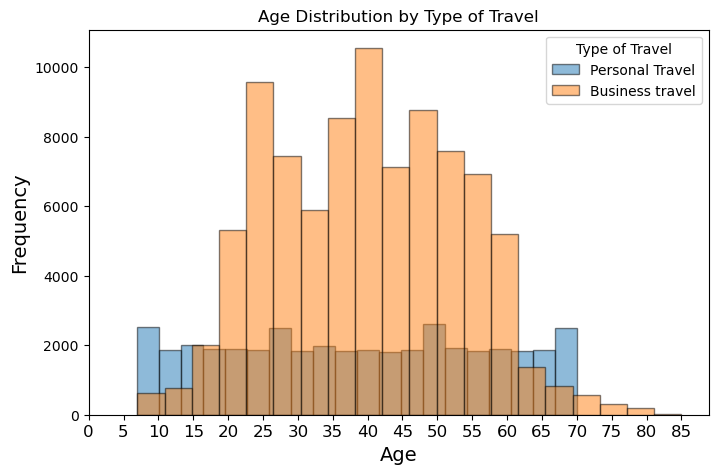

In [25]:
# Create a figure
plt.figure(figsize=(8, 5))

# Plot histogram
ages = data['Age']
type_of_travel = data['Type of Travel'].unique()

for travel_type in type_of_travel:
    subset = data[data['Type of Travel'] == travel_type]['Age']
    plt.hist(subset, bins=20, edgecolor='black', alpha=0.5, label=travel_type)

# Customize ticks and labels
plt.xticks(ticks=np.arange(0, data["Age"].max() + 5, step=5), fontsize=12)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Type of Travel", loc='upper right')
plt.title('Age Distribution by Type of Travel')

### 4.3.5 Class Proportions

C:\Users\Kayode\AppData\Local\Temp\ipykernel_13236\3806198711.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Class', palette='Set2')


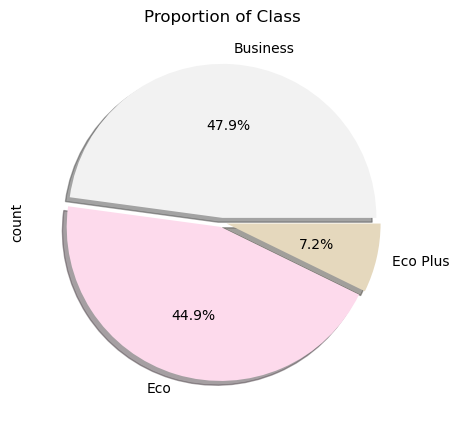

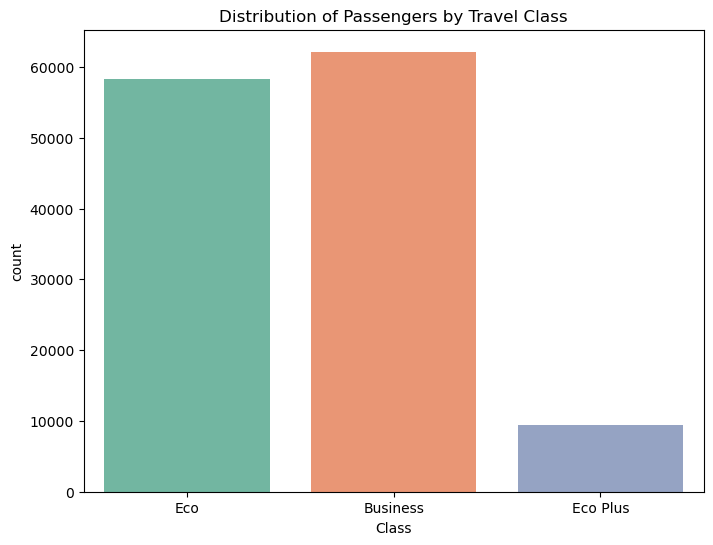

In [26]:
colors = plt.get_cmap('Pastel1_r').colors

data['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,5), title='Proportion of Class', 
                                         explode=(0.03,0.03,0.03) , shadow=True , colors=colors);

# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class', palette='Set2')
plt.title('Distribution of Passengers by Travel Class');

### 4.3.6 Correlation between independent variables

In [27]:
# Find the correlation between our independent variables
corr_matrix = data.corr(numeric_only=True)
corr_matrix 

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.020322,0.054986,-0.019559,0.001293,0.012607,0.000669,-0.000384,0.054693,0.054023,0.000830,0.055978,0.042325,0.074625,0.082644,0.080834,0.025328,-0.017643,-0.035405
Age,0.020322,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011206
Flight Distance,0.054986,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.109733
Seat comfort,-0.019559,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025463
Departure/Arrival time convenient,0.001293,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002500
Food and drink,0.012607,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014845
Gate location,0.000669,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003620
Inflight wifi service,-0.000384,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035198
Inflight entertainment,0.054693,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033182
Online support,0.054023,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.035940


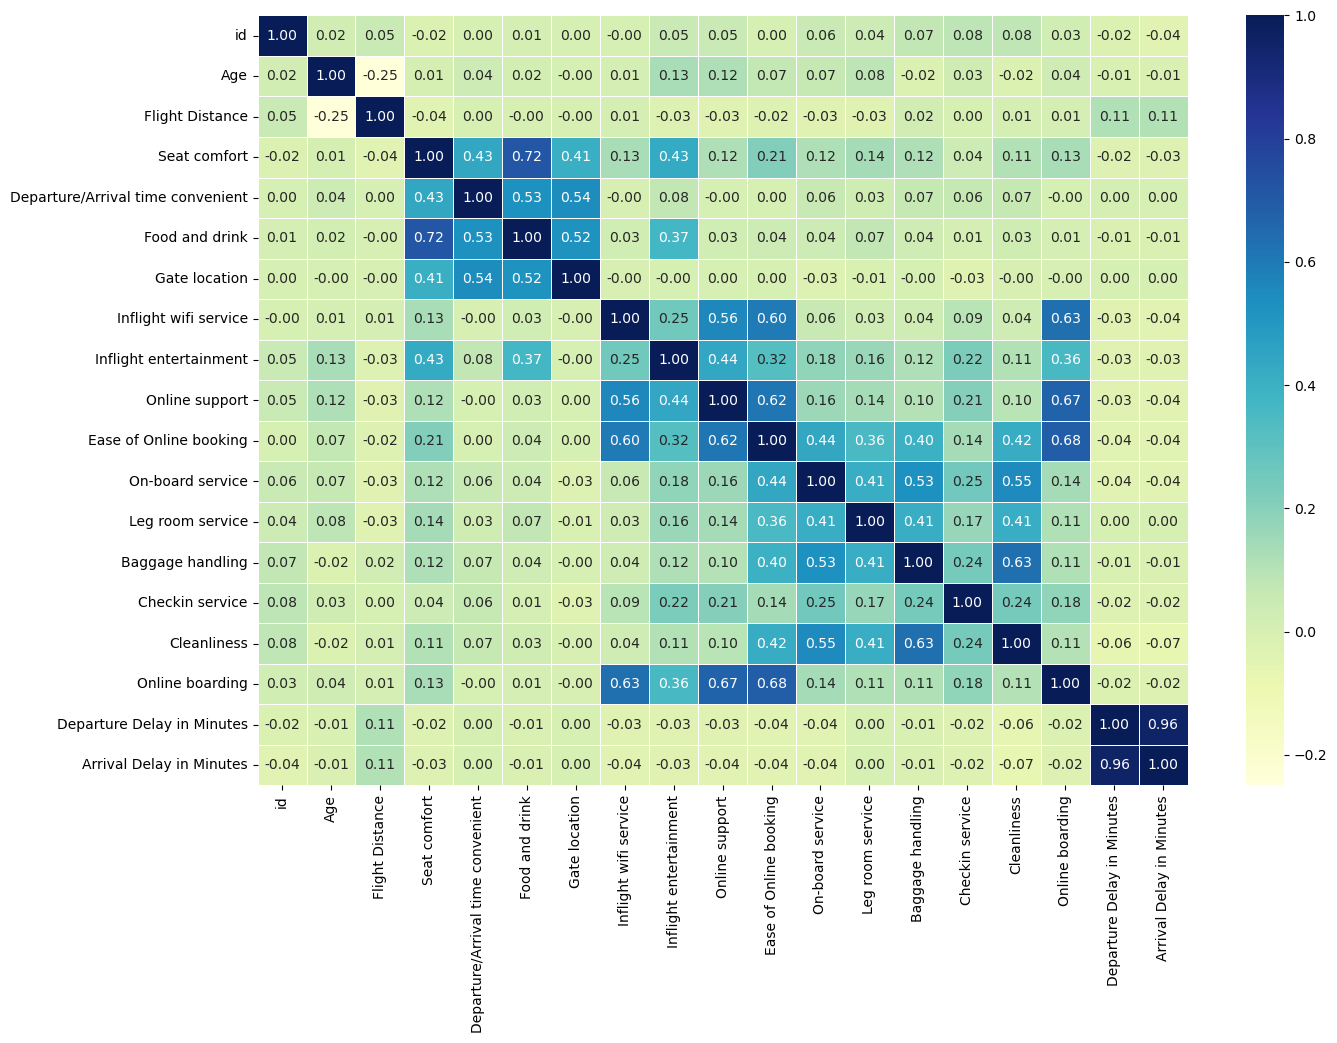

In [28]:
# Plot correllation matrix
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt= ".2f", cmap="YlGnBu");

* There's a weak negative correlation (-0.25) between age and flight distance. Older people tend to fly shorter distances, but the effect is small
* This is a strong positive correlation between 'seat comfort' and 'Food and drink' (+0.72), indicating that passengers who are satisfied with the seat comfort are also likely to be satisfied with food and drink.
* Flight Distance and On-board service (-0.0326): The distance of the flight does not strongly impact how people feel about onboard service since it has almost 0 value.

### 4.3.7 Satisfaction vs. Flight Distance

C:\Users\Kayode\AppData\Local\Temp\ipykernel_13236\2377610743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='satisfaction_v2', y='Flight Distance', palette='Pastel1')


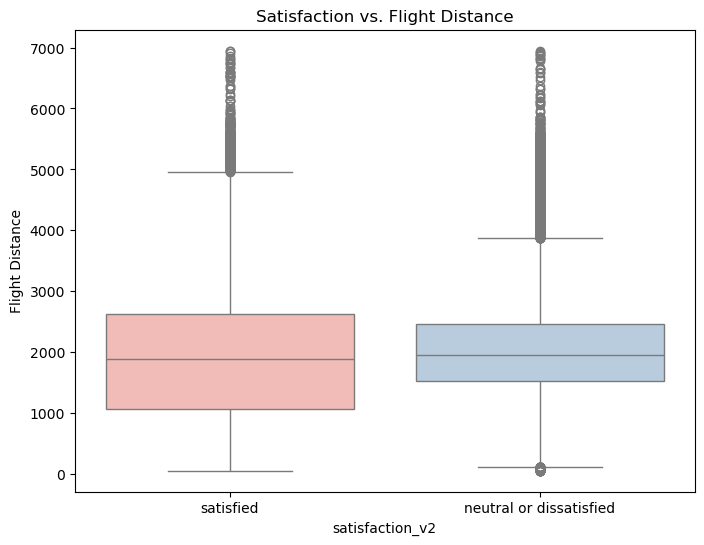

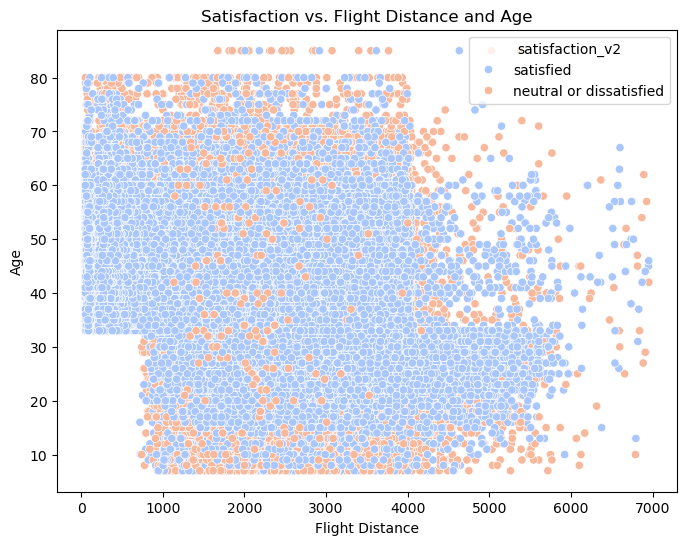

In [29]:
# Box Plot: Satisfaction vs. Flight Distance
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='satisfaction_v2', y='Flight Distance', palette='Pastel1')
plt.title('Satisfaction vs. Flight Distance');

# Scatter Plot: Satisfaction vs. Flight Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Flight Distance', y='Age', hue='satisfaction_v2', palette='coolwarm')
plt.title('Satisfaction vs. Flight Distance and Age');


### 4.3.7 Seat Comfort & Satisfaction

C:\Users\Kayode\AppData\Local\Temp\ipykernel_13236\74733566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='satisfaction_v2', y='Seat comfort', palette='Set3')


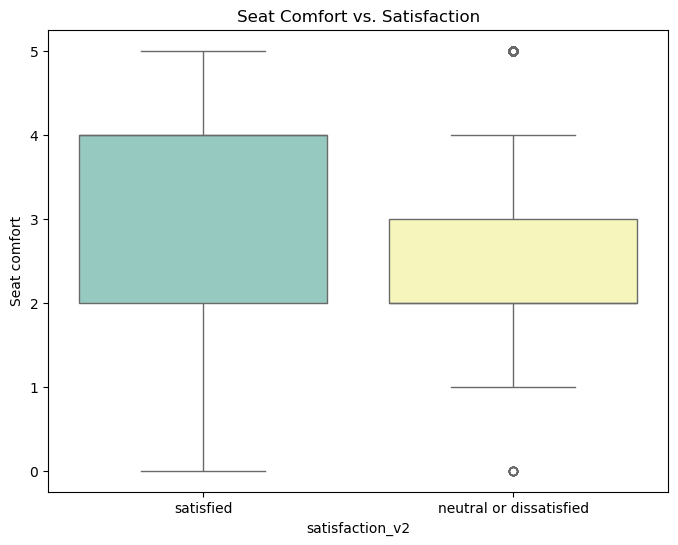

In [30]:
# Seat Comfort & Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='satisfaction_v2', y='Seat comfort', palette='Set3')
plt.title('Seat Comfort vs. Satisfaction');


### 4.3.7 Departure/Arrival Delay Impact

C:\Users\Kayode\AppData\Local\Temp\ipykernel_13236\3359819283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='satisfaction_v2', y='Departure Delay in Minutes', palette='coolwarm')
C:\Users\Kayode\AppData\Local\Temp\ipykernel_13236\3359819283.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='satisfaction_v2', y='Arrival Delay in Minutes', palette='coolwarm')


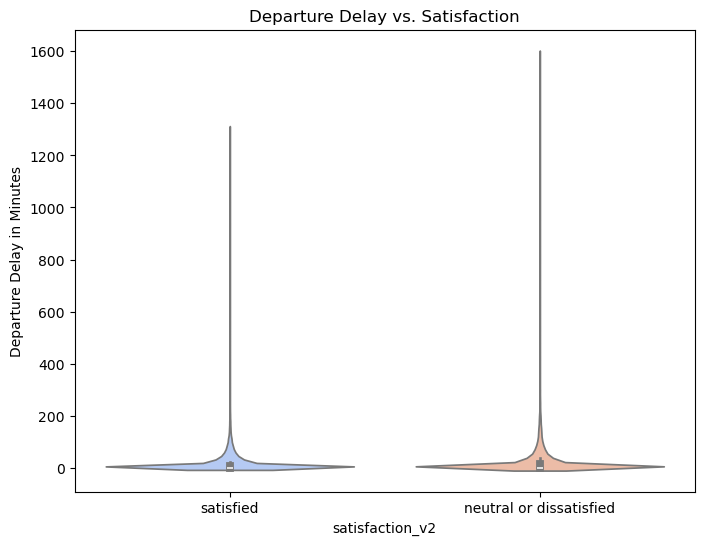

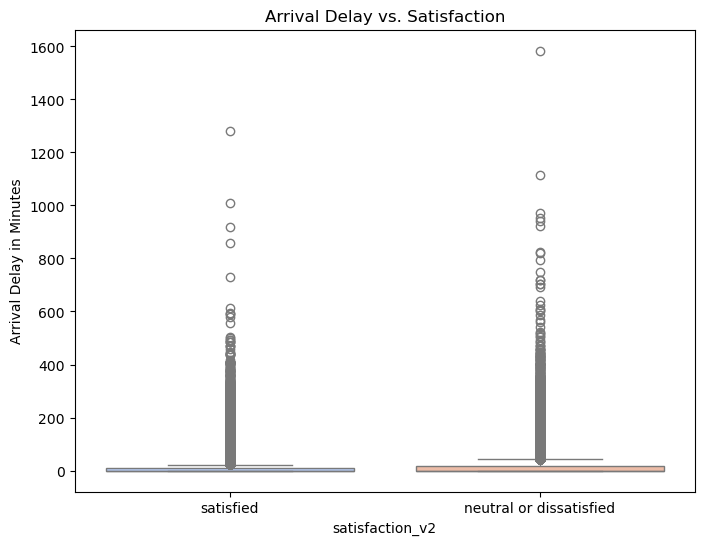

In [31]:
# Violin Plot: Departure Delay and Satisfaction
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='satisfaction_v2', y='Departure Delay in Minutes', palette='coolwarm')
plt.title('Departure Delay vs. Satisfaction');

# Box Plot: Arrival Delay and Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='satisfaction_v2', y='Arrival Delay in Minutes', palette='coolwarm')
plt.title('Arrival Delay vs. Satisfaction');


### 4.3.7 Bivariate Analysis (Categorical Features)

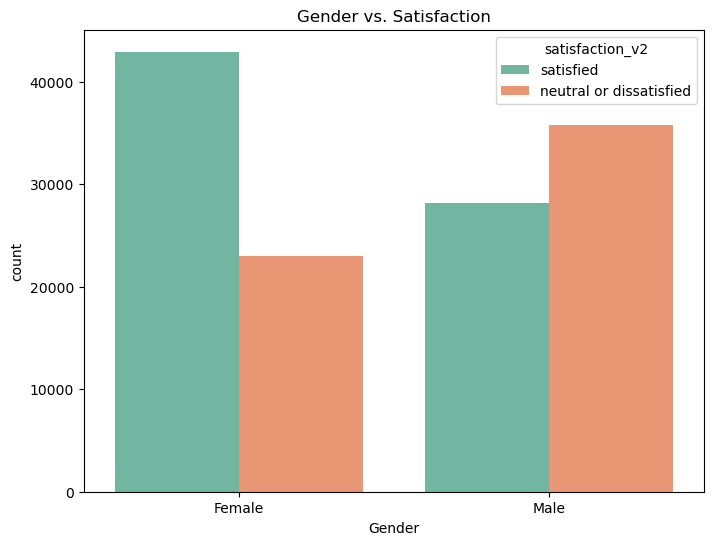

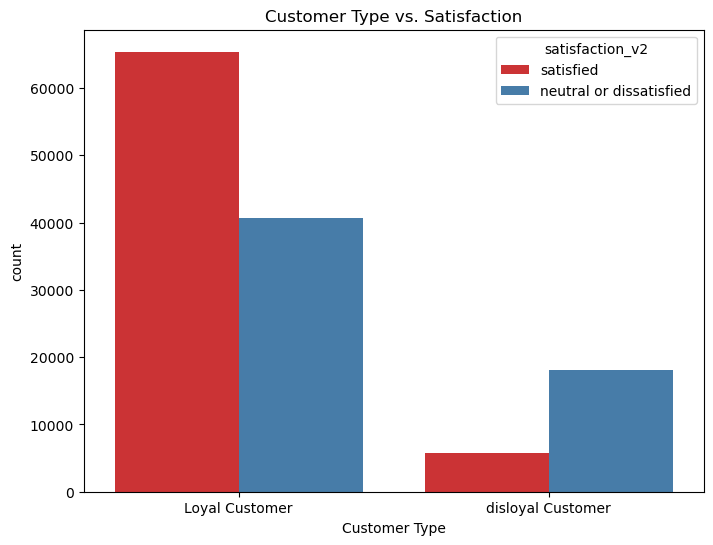

In [32]:
# Bivariate Analysis: Gender vs. Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='satisfaction_v2', palette='Set2')
plt.title('Gender vs. Satisfaction');

# Bivariate Analysis: Customer Type vs. Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Customer Type', hue='satisfaction_v2', palette='Set1')
plt.title('Customer Type vs. Satisfaction');


### 4.3.7 Pair Plot of Continuous Variables with Satisfaction

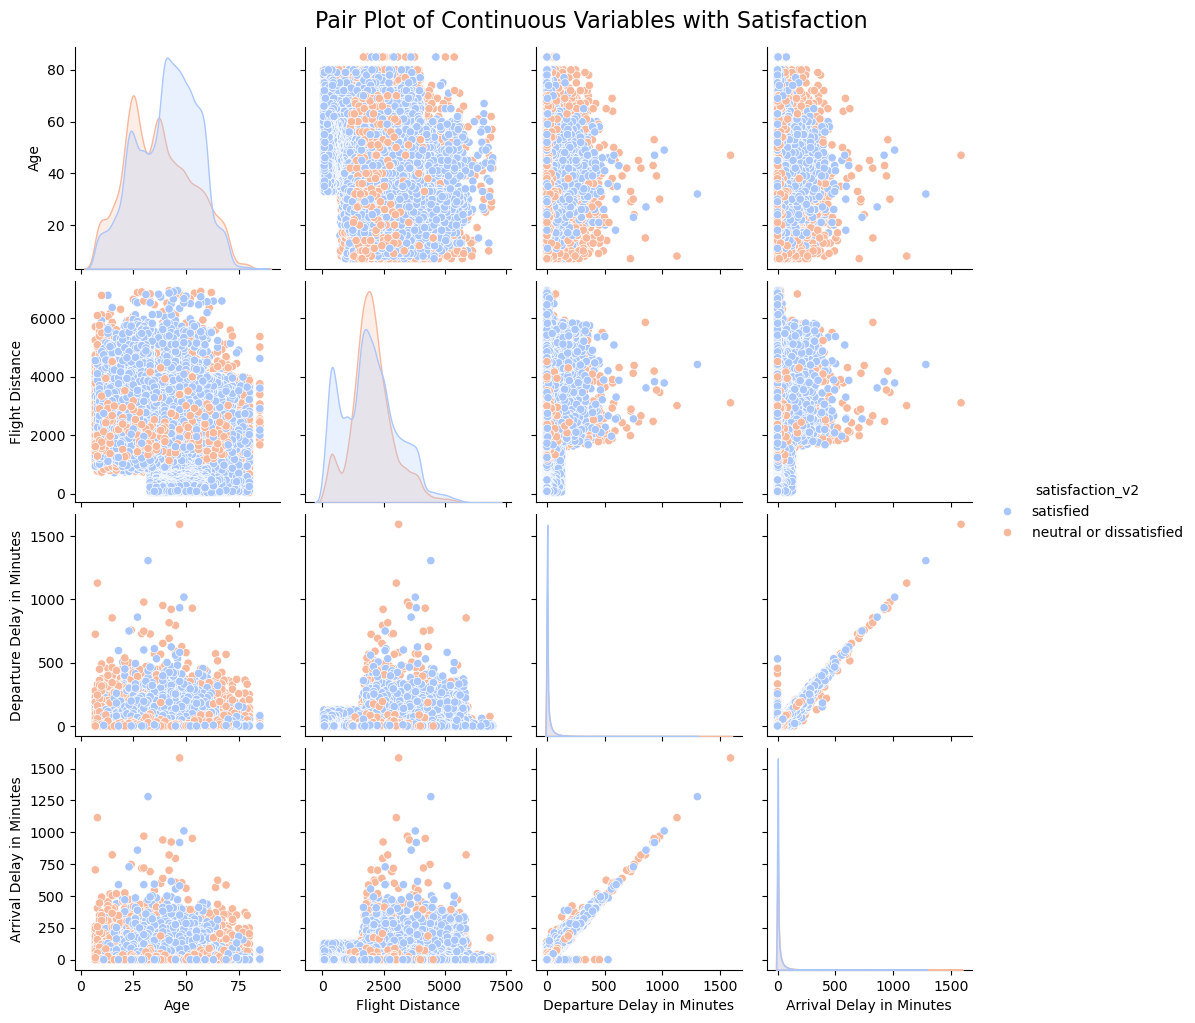

In [33]:
# Pair Plot: Continuous Variables vs. Satisfaction
sns.pairplot(data[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_v2']], 
             hue='satisfaction_v2', palette='coolwarm')

# Add title to the center top of the figure
plt.suptitle('Pair Plot of Continuous Variables with Satisfaction', y=1.02, fontsize=16);


### 4.3.7 Gender vs Gate Location Distribution

In [34]:
crosstab = pd.crosstab(data["Gender"] , data["Gate location"]) 
crosstab 

Gate location,0,1,2,3,4,5
Gender,,,,,,
Female,2,11625,12474,16197,15168,10433
Male,0,10940,12044,17349,14920,8728


Text(0.5, 1.0, 'Gender vs Gate Location Distribution')

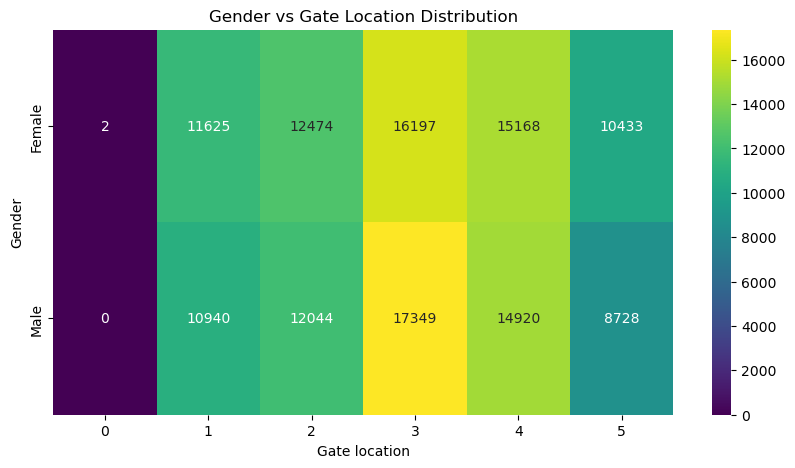

In [35]:
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab, cmap="viridis", fmt='d', annot=True)

plt.title('Gender vs Gate Location Distribution')

### 4.3.8 Satisfaction vs Gate Location Distribution

In [36]:
crosstab1 = pd.crosstab(data["satisfaction_v2"] , data["Gate location"]) 
crosstab1 

Gate location,0,1,2,3,4,5
satisfaction_v2,,,,,,
neutral or dissatisfied,0,8778,10295,18012,15109,6599
satisfied,2,13787,14223,15534,14979,12562


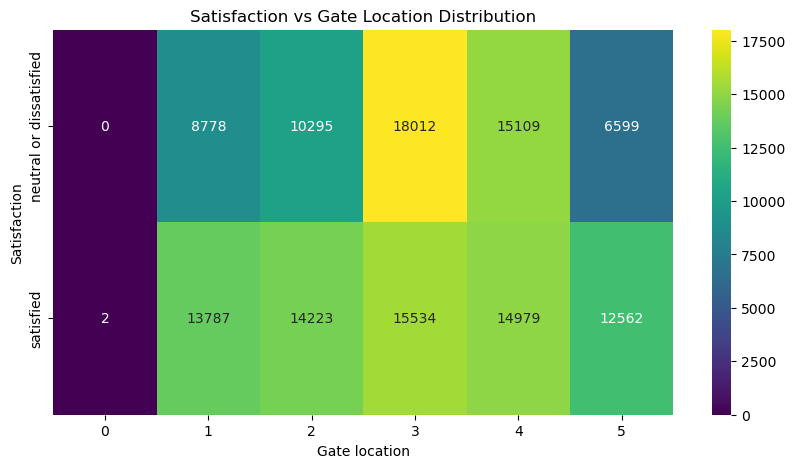

In [37]:
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab1, cmap="viridis", fmt='d', annot=True)

plt.title('Satisfaction vs Gate Location Distribution')
plt.ylabel('Satisfaction');

### 4.3.9 Satisfaction vs Baggage Handling Distribution

In [38]:
crosstab2 = pd.crosstab(data["satisfaction_v2"] , data["Baggage handling"]) 
crosstab2 

Baggage handling,1,2,3,4,5
satisfaction_v2,,,,,
neutral or dissatisfied,4603,8117,16764,19859,9450
satisfied,3372,5315,7721,28381,26298


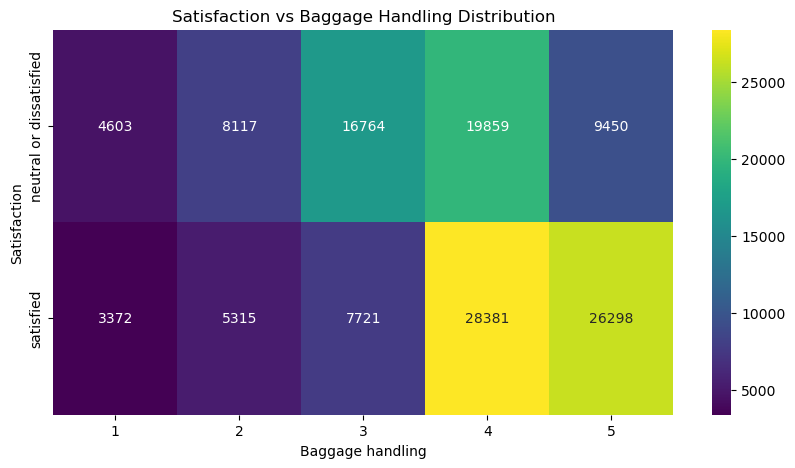

In [39]:
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab2, cmap="viridis", fmt='d', annot=True)

plt.title('Satisfaction vs Baggage Handling Distribution')
plt.ylabel('Satisfaction');

### 4.3.10 Passenger Satisfaction by Service

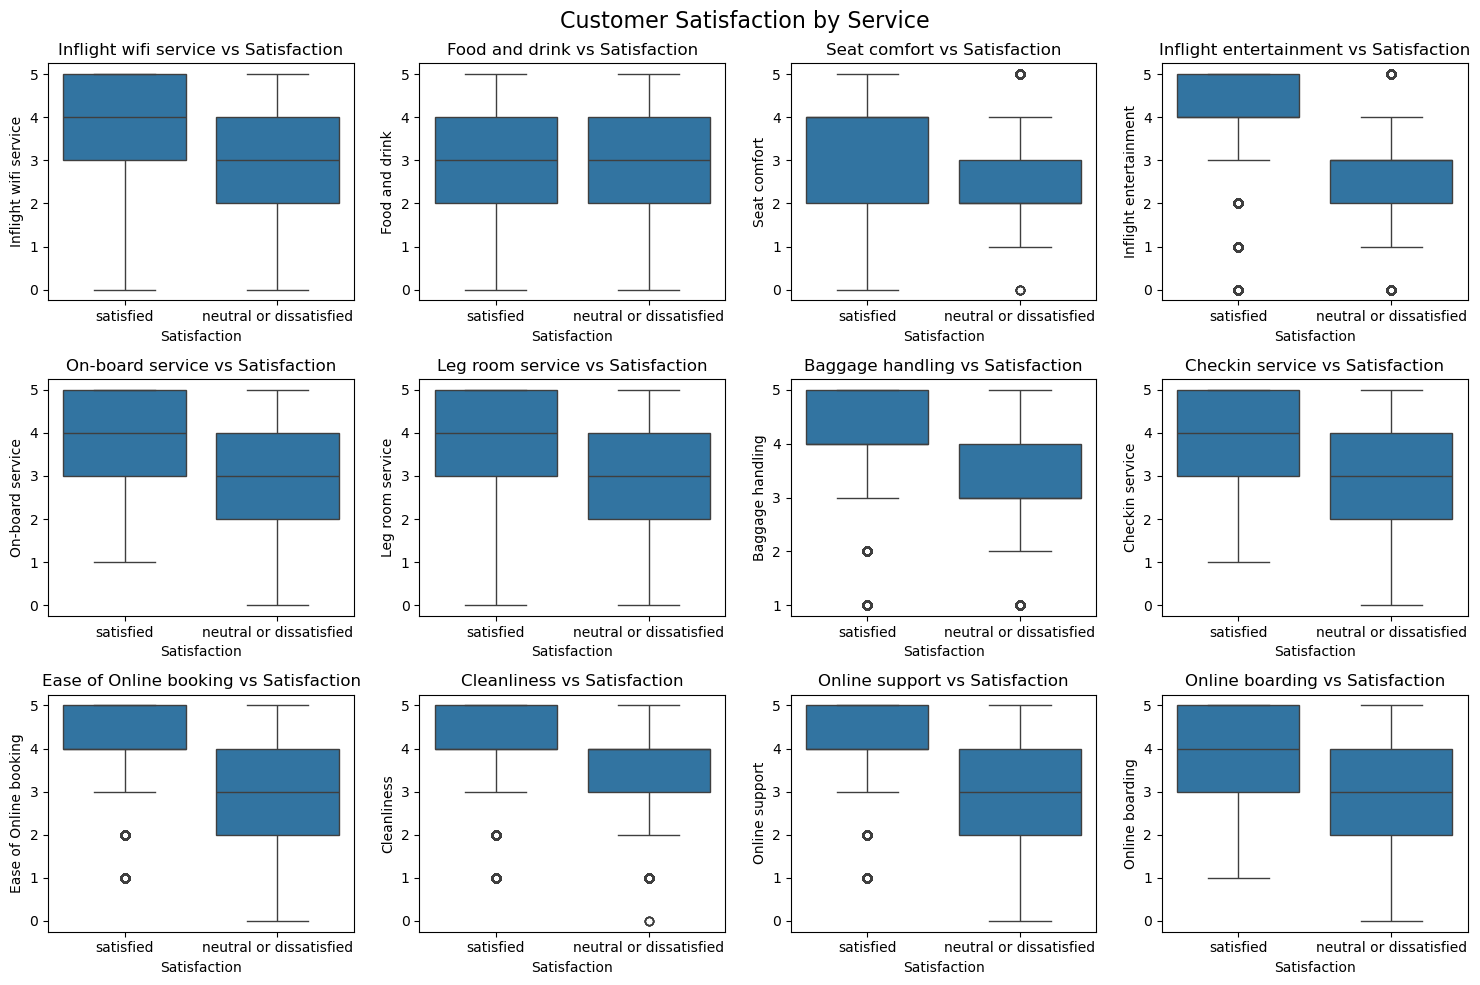

In [40]:
# List of services
services = ['Inflight wifi service', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 
            'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
            'Ease of Online booking', 'Cleanliness', 'Online support', 'Online boarding']

# Set up the figure size
plt.figure(figsize=(15, 10))

# Iterate over each service to create a subplot
for i, service in enumerate(services):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=data, x='satisfaction_v2', y=service)
    plt.title(f'{service} vs Satisfaction')
    plt.xlabel('Satisfaction')
    plt.ylabel(service)

# Add an overall title for the entire figure
plt.suptitle('Customer Satisfaction by Service', fontsize=16)

# Adjust layout to make room for the suptitle
plt.tight_layout()

## 4.4 Data pre-processing

In [41]:
df = data.copy()
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [42]:
df['satisfaction_v2'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [43]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [44]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [45]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [46]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

### 4.4.1 Map test results to 0 and 1

In [47]:
# map "Test Results as - Abnormal:0, Normal:1, Inconclusive:2
df["satisfaction_v2"] = df["satisfaction_v2"].map({"satisfied": 0, "neutral or dissatisfied": 1})
df["satisfaction_v2"] 

0         0
1         0
2         0
3         0
4         0
         ..
129875    0
129876    1
129877    1
129878    1
129879    1
Name: satisfaction_v2, Length: 129880, dtype: int64

In [48]:
df.head(2)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,110278,0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0


### 4.4.3 Convert categorical data to numerical data using pandas get_dummies

In [49]:
# Define the categorical features to transform
categorical_features = ["Gender", "Customer Type", "Type of Travel", "Class"]

dummies = pd.get_dummies(data=df[categorical_features], dtype=float)
dummies.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### 4.4.4 Drop columns

In [50]:
# drop the columns that have been transformed and mapped, and those that are deemed irrelevant to this work
df_drop = df.drop(["id", "Gender", "Customer Type", "Type of Travel", "Class"], axis=1)
df_drop 

,satisfaction_v2,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,0,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,0,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,0,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,0,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,29,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,1,63,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,1,69,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,1,66,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


### 4.4.5 Concatenate required columns

In [51]:
# Concatenate dummy variables to the remaining data
# Concatenate along columns (axis=1)
df_drop_concat = pd.concat([df_drop, dummies], axis=1)
df_drop_concat.head()


,satisfaction_v2,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### 4.4.6 Shuffle the data

In [52]:
df_shuffled = df_drop_concat.sample(frac=1)
df_shuffled.head()

,satisfaction_v2,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
103810,0,51,1055,4,3,3,3,2,3,4,4,4,4,4,2,4,2,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
94335,0,49,551,4,4,4,4,4,1,2,4,4,4,4,2,4,4,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
27593,0,48,320,5,5,5,5,3,4,5,5,5,5,5,4,5,5,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
25919,0,60,1062,1,1,1,1,4,5,4,5,5,5,5,3,5,5,0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10154,1,56,1801,2,2,2,4,3,2,3,3,1,4,3,1,3,3,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# 5. Modelling

## 5.1 Separate target from features

In [53]:
X = df_shuffled.drop(["satisfaction_v2"], axis=1)
y = df_shuffled["satisfaction_v2"]

## 5.2 Split into test and train

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 5.3 Choosing the right estimator

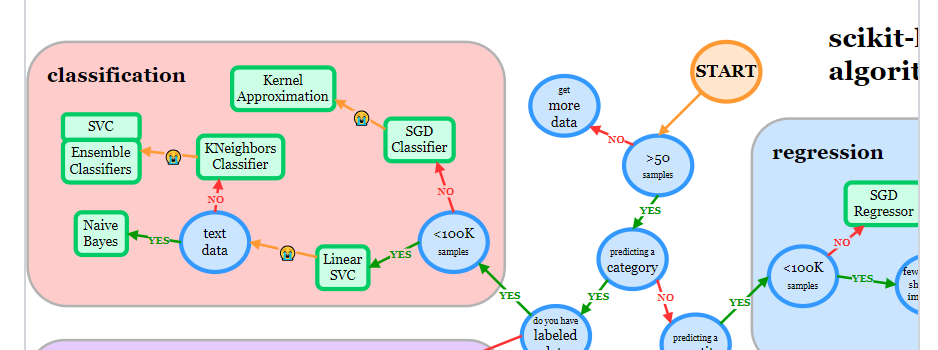

* We have some various estimators avalable for our classification problem as described in Scikit_learn Documentation. 
* In addition, Logistic Regression can also be employed.
* Based on the screenshot and sample size (), the options that fit our project are SGD Classifier, Kernel Approximation and Logistic Regression.
* But we do know Ensemble Classifiers is great for classification problem, we will try it and other available estimators not in our path.

### 5.3.1 Write function to choose the right estimator (classifier or model)

#### 5.3.1.1 Option 1

In [55]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(), 
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(), 
          "SGD Classifier": SGDClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    
    # Make a list to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [56]:
# call the fit_and_score function
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\Kayode\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7071527563905143,
 'Logistic Regression': 0.7585848475515861,
 'Random Forest': 0.9600400369571912,
 'SGD Classifier': 0.7234755158607946}

#### 5.3.1.2 Option 2 with RBFSampler in a pipeline with a classifier

RBFSampler or Nystroem cannot be put in the same function with KNN, and others in option 1 since it does not have the .score() method because it doesn't perform classification or regression directly—it's meant to be used as a preprocessing step to transform features, often in combination with a classifier or regressor like LogisticRegression, SVC, or another estimator. RBFSampler is not a machine learning model but rather a transformer that approximates a radial basis function (RBF) kernel.

* **Nystroem + Logistic Regression:**
    * The Nystroem method approximates the kernel using a subset of data points. It's useful when you want to reduce the computation cost of kernel methods for large datasets.
* **RBFSampler + Logistic Regression:**
    * RBFSampler approximates the Radial Basis Function (RBF) kernel in a linear fashion, which allows you to use linear classifiers (like logistic regression) on non-linear data.

In [57]:
# Create a pipeline for Nystroem + Logistic Regression
nystroem_pipeline = Pipeline([
    ("nystroem", Nystroem()),  # Nystroem kernel approximation
    ("log_reg", LogisticRegression())  # Logistic Regression
])

# Create a pipeline for RBFSampler + Logistic Regression
rbf_pipeline = Pipeline([
    ("rbf", RBFSampler()),  # RBFSampler kernel approximation
    ("log_reg", LogisticRegression())  # Logistic Regression
])

# Put kernel approximation models in a dictionary
kernel_models = {
    "Nystroem + Logistic Regression": nystroem_pipeline,
    "RBFSampler + Logistic Regression": rbf_pipeline
}

# Create function to fit and score models
def fit_and_score_kernel(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates kernel approximation-based machine learning models.
    models : a dict of different Scikit-Learn kernel approximation models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    
    # Dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [58]:
# Now, call fit_and_score_kernel
kernel_model_scores = fit_and_score_kernel(models=kernel_models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

kernel_model_scores

{'Nystroem + Logistic Regression': 0.5487372959655066,
 'RBFSampler + Logistic Regression': 0.5485448105943949}

### 5.3.2 Model Results Comparison

In [59]:
# Merge both model results
model_scores.update(kernel_model_scores)
model_scores

{'KNN': 0.7071527563905143,
 'Logistic Regression': 0.7585848475515861,
 'Random Forest': 0.9600400369571912,
 'SGD Classifier': 0.7234755158607946,
 'Nystroem + Logistic Regression': 0.5487372959655066,
 'RBFSampler + Logistic Regression': 0.5485448105943949}

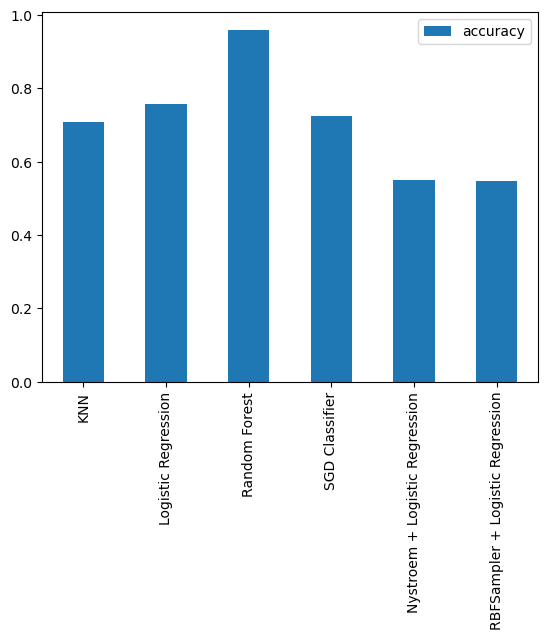

In [60]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

From the results above, 
* I will drop Nystroem + Logistic Regression, RBFSampler + Logistic Regression, and SGD Classifier due to their low scores\
* Even though Random Forest has 95% accuracy score of 96.05% which is greater than required 95% to continue with evaluation, we will still explore if
  the scores of KNN, Logistic Regression and Random Forest can be further improved 


# 6. Improving our models' baseline scores

For this classfication problem, we will look at:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Recall
* F1 score
* Cross validation
* Precision
* ROC curve
* Classification report
* Area under curve (AUC)



## 6.1 Hyperparameters tuning

### 6.1.1 Tuning KNN (KNeighborsClassifier or K-Nearest Neighbors) by hand
Default: `n_neighbors=5` which assumes a dot with the 5 closest dots around it are in the same class

In [ ]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Since the accuracy score is still less than 95%, KNN will be dropped.

### 6.1.2 Hyperparameters tuning using RandomizedSearchCV

In [ ]:
# Define LogisticRegression hyperparameters to tune
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Define RandomForestClassifier hyperparameters to tune
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

sgd_grid = {"vect__max_df": (0.5, 0.75, 1.0),
            'vect__max_features': (None, 5000, 10000, 50000),
            "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
            "clf__alpha": (0.00001, 0.000001),
            "clf__penalty": ("l2", "elasticnet"),
            'clf__max_iter': (10, 50, 80),
            "penalty": "l2"}